Q ) Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import numpy as np

In [2]:
bank = pd.read_csv(r"C:\Users\Aruna\Desktop\Assgnmnts-DS\Assignment-6\bank-full1.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Visualization

In [4]:
# importting libraries
import seaborn as sns
import matplotlib.pyplot as plt

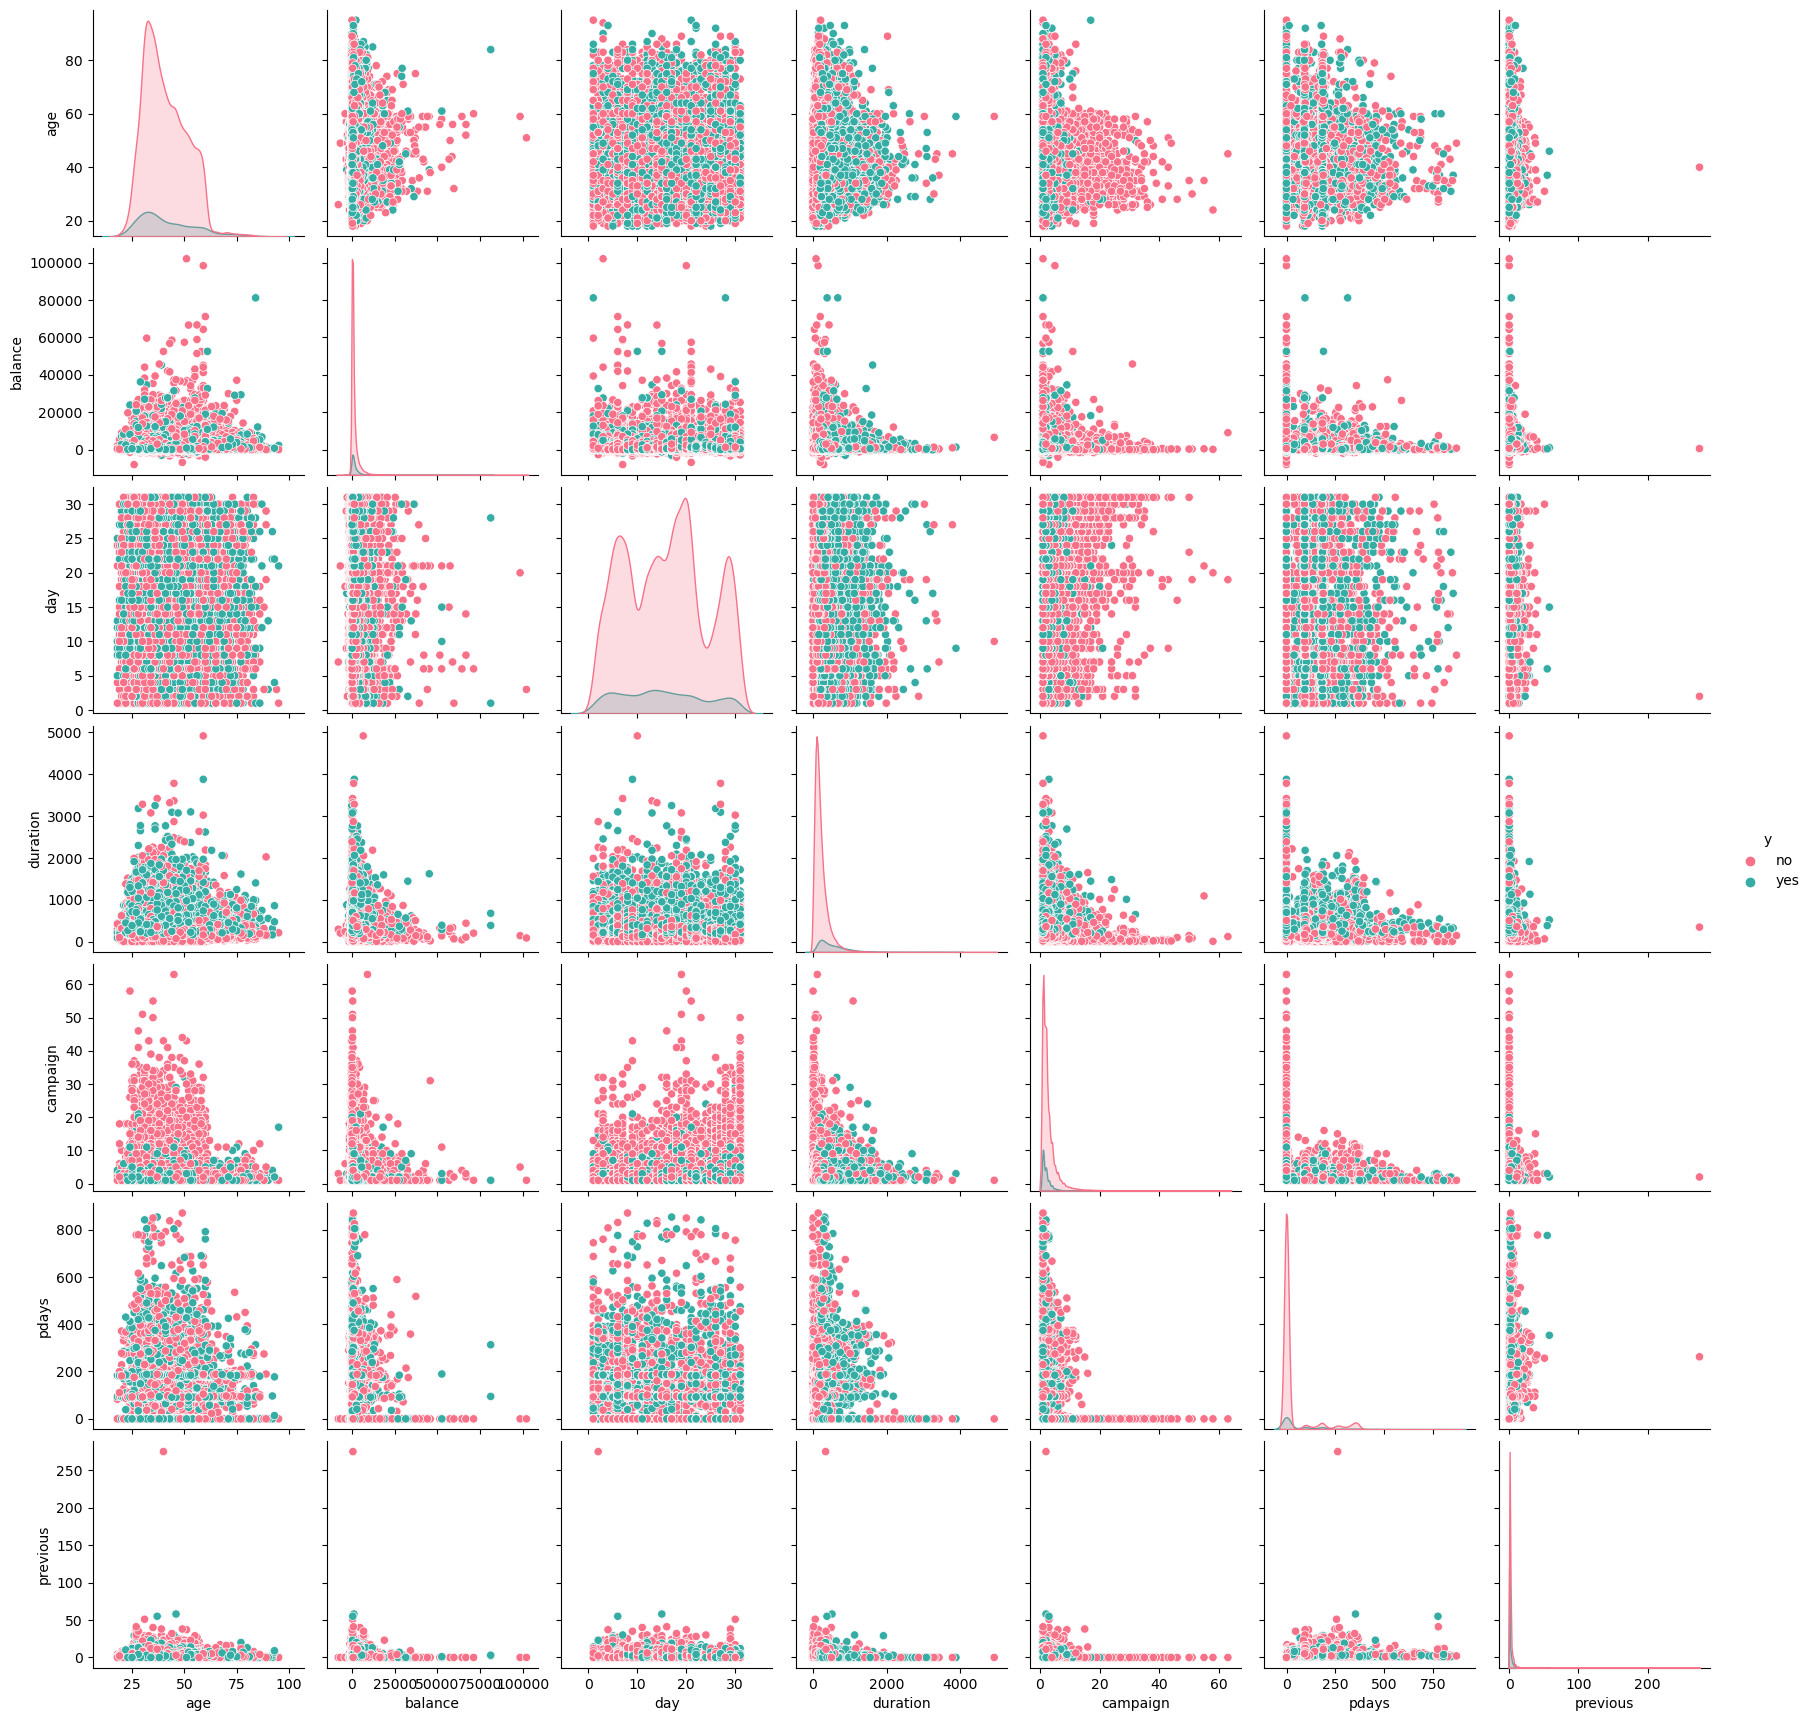

In [5]:
sns.pairplot(data = bank, hue = 'y', diag_kind = "kde", kind = "scatter", palette = "husl")
plt.show()

<Figure size 2000x1000 with 0 Axes>

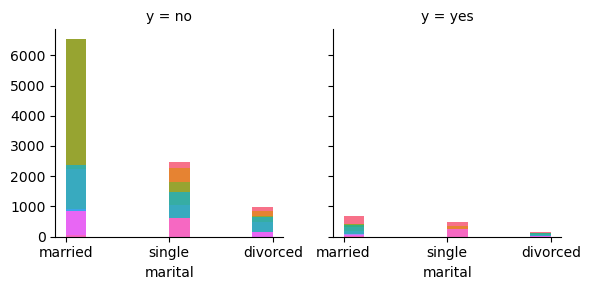

In [6]:
g = sns.FacetGrid(data = bank, col = "y", hue = "job")
plt.figure(figsize = (20,10))
g.map(plt.hist,"marital")

# based on this data set visualization the client maynot be subscribe a term deposit

# Preprocessing the Data

In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank1 = bank.drop(bank.columns[[3,5,8,10,13]],axis=1)

In [10]:
bank1

,age,job,marital,default,housing,loan,day,duration,campaign,previous,poutcome,y
0,58,management,married,no,yes,no,5,261,1,0,unknown,no
1,44,technician,single,no,yes,no,5,151,1,0,unknown,no
2,33,entrepreneur,married,no,yes,yes,5,76,1,0,unknown,no
3,47,blue-collar,married,no,yes,no,5,92,1,0,unknown,no
4,33,unknown,single,no,no,no,5,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,no,no,17,977,3,0,unknown,yes
45207,71,retired,divorced,no,no,no,17,456,2,0,unknown,yes
45208,72,retired,married,no,no,no,17,1127,5,3,success,yes
45209,57,blue-collar,married,no,no,no,17,508,4,0,unknown,no


In [11]:
bank2 = pd.get_dummies(bank1,columns=['job','marital','default','housing','loan','poutcome'])
bank3 = pd.get_dummies(bank2,columns=['y'],drop_first=True)

In [12]:
bank3

,age,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,33,5,198,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
45207,71,17,456,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
45208,72,17,1127,5,3,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
45209,57,17,508,4,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [13]:
#splitting data into x,y for kbest score for feature extraction
x = bank3.iloc[:,0:-1]
y = bank3.iloc[:,-1]

In [14]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
test = SelectKBest(score_func = chi2)
fit = test.fit(x,y)
set_printoptions(precision=4)
print(fit.scores_)

[7.8800e+01 1.5920e+02 1.8077e+06 8.4058e+02 3.5932e+03 1.2725e+00
 1.8435e+02 1.6904e+01 1.0152e+01 3.8744e+01 2.6970e+02 3.1898e-02
 3.1877e+01 2.6179e+02 3.0263e+00 1.8255e+01 3.1965e-03 3.0747e-01
 6.5353e+01 1.3084e+02 4.0963e-01 2.2314e+01 4.8674e+02 3.8895e+02
 3.3679e+01 1.7652e+02 3.9392e+00 4.4287e+01 4.1130e+03 2.3028e+02]


In [16]:
bank3

,age,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,5,261,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,33,5,198,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
45207,71,17,456,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
45208,72,17,1127,5,3,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
45209,57,17,508,4,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [17]:
bank4 = bank3.drop(bank3.columns[[1,6,8,9,10,12,13,15,16,17,18,19,21,22,25,27,28]],axis=1)

In [18]:
bank4

,age,duration,campaign,previous,job_admin.,job_entrepreneur,job_self-employed,job_technician,default_no,housing_yes,loan_no,poutcome_failure,poutcome_unknown,y_yes
0,58,261,1,0,0,0,0,0,1,1,1,0,1,0
1,44,151,1,0,0,0,0,1,1,1,1,0,1,0
2,33,76,1,0,0,1,0,0,1,1,0,0,1,0
3,47,92,1,0,0,0,0,0,1,1,1,0,1,0
4,33,198,1,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,977,3,0,0,0,0,1,1,0,1,0,1,1
45207,71,456,2,0,0,0,0,0,1,0,1,0,1,1
45208,72,1127,5,3,0,0,0,0,1,0,1,0,0,1
45209,57,508,4,0,0,0,0,0,1,0,1,0,1,0


here dropping the unwanted columns based on the KBest score 

# Preparing Logistic model

In [19]:
# here fitting a model based on KBest score values
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
x = bank4.iloc[:,0:-1]
y = bank4.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [22]:
# Fitting model
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Aruna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Predicting with x_test data
y_pred = model.predict(x_test)

In [24]:
# predicting with x_train data
y_pred_train = model.predict(x_train)

In [25]:
# calculating accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [26]:
test_accuracy = accuracy_score(y_test,y_pred)
print('Test Accuracy Score:',test_accuracy*100)

Test Accuracy Score: 100.0


In [27]:
train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy Score:',train_accuracy*100)

Train Accuracy Score: 89.48009118877405


In [28]:
test_matrix = confusion_matrix(y_test,y_pred)
print(test_matrix)

[[28  0]
 [ 0  2]]


In [29]:
train_matrix = confusion_matrix(y_train,y_pred_train)
print(train_matrix)

[[39067   827]
 [ 3926  1361]]


In [30]:
test_report = classification_report(y_test,y_pred)
print('Classification Report:\n',test_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00         2

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
train_report = classification_report(y_train,y_pred_train)
print('Classification Report:\n',train_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39894
           1       0.62      0.26      0.36      5287

    accuracy                           0.89     45181
   macro avg       0.77      0.62      0.65     45181
weighted avg       0.88      0.89      0.87     45181



In [32]:
from sklearn.metrics import classification_report
y_pred1 = model.predict_proba(x)[:,1]

In [33]:
y_pred1

array([0.0435, 0.0291, 0.0086, ..., 0.9491, 0.2146, 0.5545])

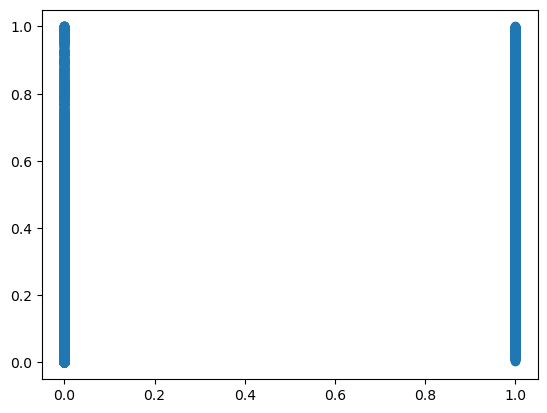

In [38]:
plt.scatter(x= y, y = y_pred1)

# Roc Curve

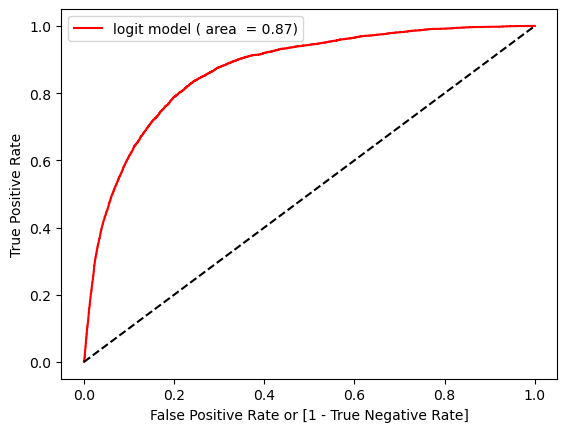

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_pred1)

auc = roc_auc_score(y, y_pred1)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()